In [81]:
import pandas as pd
import glob
import pyBigWig
import seaborn as sns
data='/labs/mpsnyder/moqri/data/index/mice/'
mm_='http://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/mm10.chromAlias.txt'
ez_='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE94nnn/GSE94300/suppl/GSE94300_E14Ezh2_MAnorm_unbiased.bed.gz'
h_='http://smithdata.usc.edu/methbase/data/Stadler-Mouse-2011/Mouse_ESC/tracks_mm10/Mouse_ESC.meth.bw'
meta_='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE80nnn/GSE80672/matrix/GSE80672_series_matrix.txt.gz'
all_files = glob.glob(data + "*.gz")
def get_m():
    li = []
    for f in all_files:
        gsm=f.split('GSM')[1].split('_')[0]
        if gsm in meta.gsm.tolist():
            print('',end='-')
            df= pd.read_table(f, index_col=None, header=0, usecols=[1])
            df.columns=[gsm]
            li.append(df)
    df = pd.concat(li, axis=1)
    return df

In [82]:
m2df():
    df=get_m()
    m = pd.read_table(all_files[0], index_col=None, header=0)
    m.columns=['i','p','c']
    m['m_ch']=m.i.str.split('|').str[3]
    m['pos']=m.i.str.split('|').str[4].str.strip(':').astype(int)
    ma=m.merge(mm[['ch']],left_on='m_ch',right_index=True)
    ma.shape
    ma['ch']=pd.to_numeric(ma.ch,errors='coerce')
    ma=ma.loc[ma.ch.dropna().index]
    ma['ch']=ma.ch.astype(int)
    df=df.loc[ma.index]
    ma.index=ma.ch.astype(str)+'_'+ma.pos.astype(str)
    df.index=ma.index.values
    df.to_csv('all.csv')

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [85]:
df=pd.read_csv(data+'all.csv',index_col=0)

In [153]:
df.shape

(1940728, 195)

In [3]:
h=pyBigWig.open(h_)
h1=h.intervals("chr"+str(1))
print(len(h1))
h1=pd.DataFrame(h1)
h1.index=h1[1]
h1=h1[2]
h1l=h1[h1<.5]
h1l.shape

1471976


(245955,)

In [6]:
mm=pd.read_table(mm_,index_col=1)
mm.shape

(66, 3)

In [7]:
mm.columns=['','','ch']
mm.head(1)

,,,ch
NC_000067.6,chr1,CM000994.2,1


In [8]:
meta=pd.read_table(meta_,skiprows=34,header=None).T

In [9]:
meta=meta[meta[5]=='Whole Blood']

In [10]:
meta=meta[meta[11]=='genetic condition: Wild Type']
meta['gsm']=meta[46].str[3:]
meta['age']=meta[9].str.strip('age (years): ').astype(float)
meta.index=meta.gsm

In [35]:
ezs=[]
ez=pd.read_table(ez_,header=None)
ez.columns=['chrom', 'chromStart', 'chromEnd']
print(ez.shape)
for ch in range(1,20):
    ezc=ez[ez['chrom']=='chr'+str(ch)]
    print(len(ezc),end=',')
    ezc['r']=ezc.apply(lambda x:range(x['chromStart'],x['chromEnd']),1)
    ezc=ezc['r'].tolist()
    ezc=set([item for sublist in ezc for item in sublist])   
    print(len(ezc),end='-')
    for b in ezc:
        ezs.append([ch,b])
ezs=pd.DataFrame(ezs)        

(7213, 3)
462,526102-687,899107-337,395428-455,508115-474,596826-400,520490-438,488638-400,473660-374,426816-293,335768-536,651924-332,389072-351,426337-286,369904-320,377446-155,193966-266,307134-252,284005-227,286329-

In [36]:
#ezs['ch']=ezs.ch.astype(int)
ezs.columns=['ch','pos']
ezs['ez']=True

In [ ]:
ezs.index=ezs.ch.astype(str)+'_'+ezs.pos.astype(str)

In [201]:
pl=df[df.index.isin(ezs.index)].mean()

In [123]:
me=ma.merge(ezs,left_on=['ch','pos'],right_on=['ch','pos'],how='left')
me.shape

(1940728, 8)

In [41]:
#mh=me[me.pos.isin(h1.index)]

In [131]:
cc=1

<function chr(i, /)>

In [125]:
mez=me[me.pos.isin(ezs.pos)]

In [227]:
df

,2132715,2132824,2132721,2132935,2132748,2132754,2132846,2132850,2132884,2132752,...,2132729,2132851,2132951,2132866,2132949,2132856,2132938,2132860,2132831,2132840
19_10017878,30.434783,33.333333,43.75,44.444444,33.333333,61.111111,46.153846,75.000000,33.333333,40.000000,...,60.000000,55.000000,47.058824,35.294118,52.631579,47.058824,42.857143,23.529412,28.571429,18.181818
19_10017946,17.391304,16.666667,43.75,50.000000,55.555556,55.555556,61.538462,65.000000,44.444444,50.000000,...,40.000000,30.000000,64.705882,64.705882,52.631579,35.294118,42.857143,43.750000,42.857143,45.454545
19_10018078,0.000000,0.000000,6.25,11.111111,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,5.263158,5.882353,0.000000,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000
19_10018090,0.000000,0.000000,0.00,5.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,10.000000,5.882353,0.000000,0.000000,0.000000,0.000000,6.250000,7.142857,0.000000
19_10018131,0.000000,0.000000,0.00,5.555556,5.555556,5.555556,0.000000,15.000000,0.000000,0.000000,...,0.000000,35.000000,5.882353,0.000000,5.263158,0.000000,0.000000,0.000000,7.142857,9.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_9998835,97.916667,100.000000,100.00,100.000000,97.500000,78.571429,100.000000,100.000000,84.615385,100.000000,...,100.000000,96.000000,100.000000,100.000000,98.245614,96.000000,100.000000,100.000000,100.000000,100.000000
1_9998954,96.581197,83.333333,100.00,100.000000,97.222222,93.750000,100.000000,95.555556,100.000000,94.444444,...,97.435897,91.666667,100.000000,100.000000,100.000000,100.000000,100.000000,96.296296,100.000000,92.000000
1_9998955,100.000000,75.000000,100.00,97.142857,92.500000,100.000000,100.000000,100.000000,92.307692,100.000000,...,100.000000,100.000000,100.000000,100.000000,92.982456,96.000000,100.000000,100.000000,90.000000,93.939394
1_9998971,0.854701,8.333333,0.00,5.405405,2.777778,0.000000,16.666667,2.222222,0.000000,0.000000,...,5.128205,4.166667,2.777778,0.000000,3.225806,9.090909,4.000000,11.111111,15.151515,0.000000


In [229]:
pl=df[(df[['2132713','2132824']].mean(1)<20)&(df.index.isin(ezs.index))]
print(pl.shape)
pl=pl.mean()

(312210, 195)


<ipython-input-230-6f7bc5e71c3f>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  dg=pd.concat([pl,meta[[12,'age']].loc[df.columns]],1)


<AxesSubplot:xlabel='age', ylabel='0'>

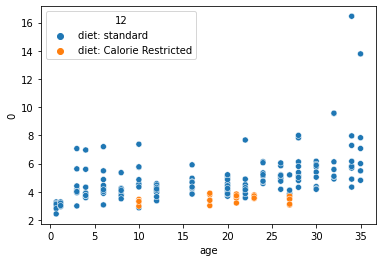

In [230]:
dg=pd.concat([pl,meta[[12,'age']].loc[df.columns]],1)
sns.scatterplot(data=dg,x='age',y=0,hue=12)

In [232]:
pl=df[df[['2132713','2132824']].mean(1)>60]
print(pl.shape)
pl=pl.mean()

(605107, 195)


<ipython-input-233-6f7bc5e71c3f>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  dg=pd.concat([pl,meta[[12,'age']].loc[df.columns]],1)


<AxesSubplot:xlabel='age', ylabel='0'>

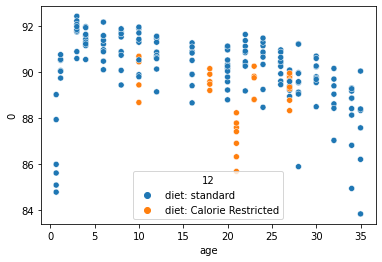

In [233]:
dg=pd.concat([pl,meta[[12,'age']].loc[df.columns]],1)
sns.scatterplot(data=dg,x='age',y=0,hue=12)

In [97]:
dg.corr()

,0,age
0,1.000000,-0.077043
age,-0.077043,1.000000
